# Linear Regression 

### Using some basic libraries to generating data and splitting the data 

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### getting the dataset 

In [2]:
X, y = datasets.make_regression(n_samples=100, n_features=3, noise=20, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### plotting the data 

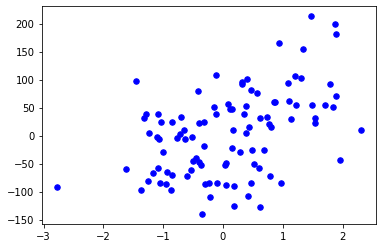

In [3]:
plt.scatter(X[:,0], y, color='b', marker='o', s=30)
plt.show()

### The Linear Regression Class 

In [4]:
class Linear_Regression:
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate*dw
            self.bias -= self.learning_rate*db
            
    def predict(self, X): 
        try:
            y_pred = np.dot(X, self.weights) + self.bias
            return y_pred
        except:
            print("Model not fitted !!")

In [5]:
linear_regressor = Linear_Regression()

In [6]:
linear_regressor.fit(X_train, y_train)

In [7]:
y_pred = linear_regressor.predict(X_test)

In [8]:
y_pred.shape, y_test.shape

((20,), (20,))

### Get the error of Our Linear Regressor

In [9]:
def mse(y, y_pred):
    # Getting Mean Squared Error
    return np.mean((y - y_pred)**2)

In [10]:
mse_value = mse(y_test, y_pred)

In [11]:
mse_value

420.97284048937536

### Let's Use sklearn 

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred2 = lr.predict(X_test)

In [16]:
mse_value2 = mse(y_test, y_pred2)

In [17]:
mse_value2

421.6665829361976

#### So Guys our Model performs well and even better